# Задача №6

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

![image.png](images/problem6_1.png)

In [5]:
def rk4(ode_function, initial_value, time_step, time_span):
    time_points = [0]
    values = [initial_value]
    num_steps = int(time_span / time_step)
    for _ in range(num_steps):
        t = time_points[-1]
        y = values[-1]
        k1 = ode_function(t, y)
        k2 = ode_function(t + time_step / 2, y + time_step * k1 / 2)
        k3 = ode_function(t + time_step / 2, y + time_step * k2 / 2)
        k4 = ode_function(t + time_step, y + time_step * k3)
        next_value = y + (time_step / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        time_points.append(t + time_step)
        values.append(next_value)
    return time_points, values

TypeError: bad operand type for unary -: 'list'

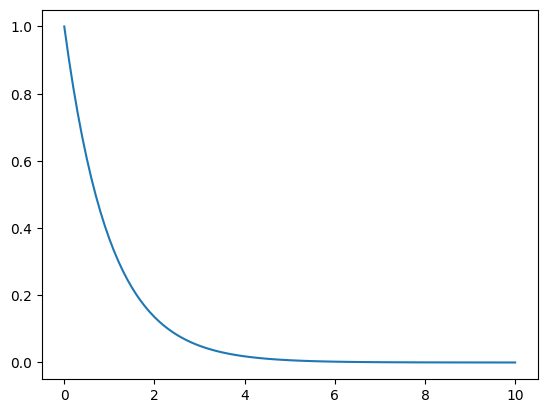

In [9]:
def f(t, y):
    return -y

initial_value = 1

def f_actual(y):
    return np.exp(-y) * np.exp(np.log(initial_value))


time_points, values = rk4(f, initial_value, 0.1, 10)

# print(time_points)
# print(values)

# for i in [0.1, 0.01]:
#     time_points, values = rk4(f, initial_value, i, 10)
#     print(abs(f_actual(time_points[-1]) - values[-1]))

plt.plot(time_points, values, label="rk4")
plt.plot(time_points, f_actual(time_points), label="rk4")
plt.legend()
plt.show()
# plt.plot(time_points, [f_actual(y) for y in time_points], label="actual")
f_actual_arr = [f_actual(y) for y in time_points]
plt.plot(time_points, [abs(values[i] - f_actual_arr[i])/f_actual_arr[i] for i in range(len(values))], label="error")
plt.legend()
plt.show()
